In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')

In [3]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [4]:
df.isnull()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6699,False,False,False,False,False,False,False,False,False
6700,False,False,False,False,False,False,False,False,False
6701,False,False,False,False,False,False,False,False,False
6702,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [6]:
df = df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6698 non-null   int64  
 1   Age                  6698 non-null   float64
 2   Gender               6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Job Title            6698 non-null   object 
 5   Years of Experience  6698 non-null   float64
 6   Salary               6698 non-null   float64
 7   Country              6698 non-null   object 
 8   Race                 6698 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 523.3+ KB


In [12]:
country_count = df['Country'].value_counts()
country_count

USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: Country, dtype: int64

In [13]:
race_count = df['Race'].value_counts()
race_count

White               1962
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Salary'>

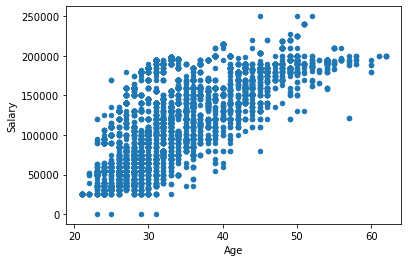

In [19]:
df.plot(kind='scatter',x='Age',y='Salary')

<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

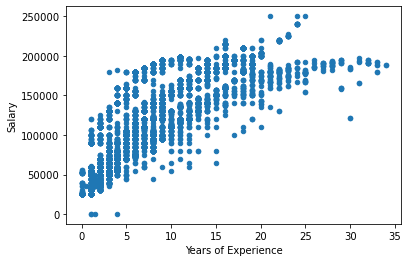

In [22]:
df.plot(kind='scatter',x='Years of Experience',y='Salary')

In [23]:
df = df.drop('Unnamed: 0',axis=1)

In [24]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [27]:
X.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,USA,Hispanic


In [45]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [1,2,3,5,6])
], remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.9696456077684751
MAE: 3142.207131011609


C:\Users\soham\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [46]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [1,2,3,5,6])
], remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.9771777539734824
MAE: 3373.1584961130493


C:\Users\soham\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [47]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))